In [2]:
import numpy as np
import matplotlib.pyplot as plt  # For plotting
from matplotlib import cm  # Colormap for plots

In [14]:
fontsize= 14
ticksize = 14
figsize = (8, 6)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

In [15]:
def prices(ζ,t):
    β = 0.9
    c = 0.01
    g = -0.1
    y_0 = 0.08
    x_0 = np.array([1.0, y_0])
    A  = np.array([[1, 0], [c, 1+g]])
    G = np.array([0.0, 1.0])
    H = G @ np.linalg.inv(np.eye(2) - β * A)
    x = np.zeros([2,t])
    pf = np.zeros(t-1)
    bubble = (1/β)**np.arange(t-1)
    x[:,0] = x_0
    for i in range(1,t):
        x[:,i] = A@x[:,i-1]
        pf[i-1] = H @ x[:,i-1]
    return np.arange(t-1), pf+ζ*bubble

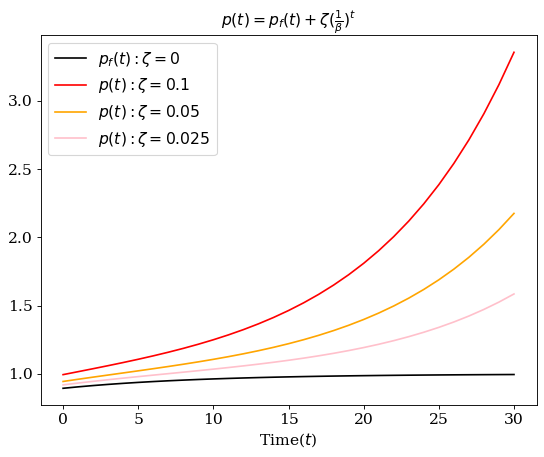

In [22]:
plt.plot(prices(ζ=0.0,t=32)[0],prices(ζ=0,t=32)[1], color = "k", label= r"$p_f(t): \zeta = 0$ ")
plt.plot(prices(ζ=0.1,t=32)[0],prices(ζ=0.1,t=32)[1],color = "r", label = r"$p(t): \zeta = 0.1$" )
plt.plot(prices(ζ=0.05,t=32)[0],prices(ζ=0.05,t=32)[1], color = "orange", label = r"$p(t): \zeta = 0.05$")
plt.plot(prices(ζ=0.025,t=32)[0],prices(ζ=0.025,t=32)[1], color = "pink", label = r"$p(t): \zeta = 0.025$")
plt.legend(loc='best')
plt.title(r"$p(t) = p_f(t)+ \zeta (\frac{1}{\beta})^t$")
plt.xlabel(r"Time($t$)")

plt.savefig('bubble_solution.pdf')
